# Titanic Dataset: Exploratory Data Analysis

In this notebook, we will analyse the most famous Titanic dataset taken from Kaggle. The dataset is completely meant for supervised machine learning, but we're only going to do some exploratory analysis in this IPython Notebook to prove myself good at Exploratory Analysis.

We will try to answer the following questions using this analysis:

    a) What were the details about passengers on the Titanic? (forexample: Ticket Number, Cabin, age, gender, class.. etc)
    b) What deck were the passengers on and how does that relate to their class?
    c) Where did the passengers come from?
    d) Details of Passengers about the details of their family members on ship?
    e) What factors helped someone survive the sinking?

### Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import os
os.chdir("C:\\Users\\hr\\Downloads\\ML_Practice\\Micro-Projects\\Exploratory Data Analysis\\Titanic")

In [5]:
data = pd.read_csv("train.csv")

First thing to do after uploading the dataset is to look at the first few rows of data to know more about your dataset

In [6]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Find the Information about all your features in your dataset. Here, you can see that there are 3 types of datatypes available in your dataset. (Int, Float and Object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Find out the shape of your data. Shape of your data generally tells about the number of rows and columns in your dataset. In this data, we have 891 rows and 12 columns as shown below

In [9]:
data.shape

(891, 12)

Describe my dataset to identify the distributioon of the data. This is applicable only to numerical data features. "describe()" function tells us about the count, mean, quantiles etc of your features.

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Values Info

The next step after getting the information about features and it's distribution, next thing we have to do is to identify the Missing Values in your data. because, your model will not predict the output if your data has missing values. So, first we try to identify them.

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The dataset shows that most of the features do not have any missing values in the dataset except "Age", "Cabin" and "Embarked". Out of which "Cabin" feature has the highest number of missing with 687, followed by "Age" with 177 and "Embarked" with 2.

<Figure size 1080x720 with 0 Axes>

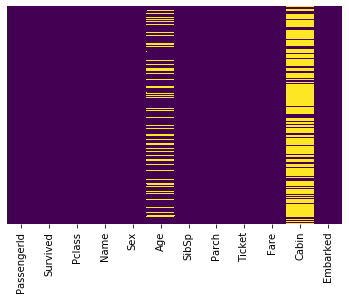

<Figure size 1080x720 with 0 Axes>

In [14]:
sns.heatmap(data=data.isnull(),yticklabels=False,cmap='viridis',cbar=False)
plt.figure(figsize=(15,10))

In this heatmap, we can see that the parts covered with Yellow represents you with the missing values. Mostly, yellow color is available on "Age" and "Cabin". "Embarked" also have but we cannot see it because the values are very negligible for graph.

### How many Male and Female people are there in the Titanic ?

In [15]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Figure size 1080x576 with 0 Axes>

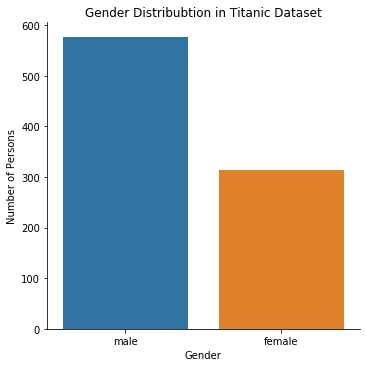

In [27]:
plt.figure(figsize=(15,8))
sns.catplot('Sex', data = data, kind='count')
plt.xlabel("Gender")
plt.ylabel("Number of Persons")
plt.title("Gender Distribubtion in Titanic Dataset")
plt.show()

This shows that we have 577 Male and 314 Female persons travelling in Titanic. This plot tells us that we have more Male passengers on board than the female passengers. 

Now, let's take a look at the division of passengers based on their Travelling Class.

In [29]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Figure size 1080x576 with 0 Axes>

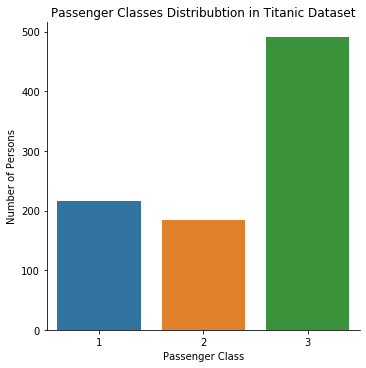

In [30]:
plt.figure(figsize=(15,8))
sns.catplot('Pclass', data = data, kind='count')
plt.xlabel("Passenger Class")
plt.ylabel("Number of Persons")
plt.title("Passenger Classes Distribubtion in Titanic Dataset")
plt.show()

The graph shows us that there are 3 different Socio-Economic passenger classes in Titanic. They are 1st Class, 2nd Class and 3rd Class. Graph tells us that 216 people are travelling through 1st class, 187 people are travelling in 2nd Class and 491 people are travelling in 3rd class. Now, we divide the people of each socio-economic class based on Genders.

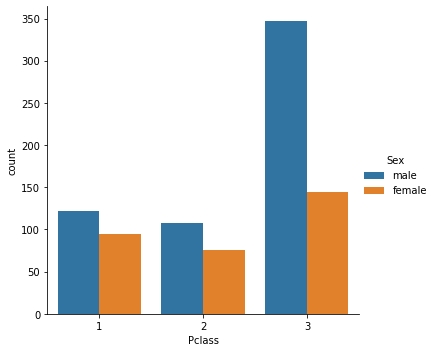

In [31]:
sns.catplot('Pclass', data=data, hue='Sex', kind='count')

The above graph shows the distribution of number of male and female passengers travelling through each class.

Let's try to segregate the people into Man, Woman and Children based on their Age. Let's try a function to identify them.

In [38]:
def category(data):
    Age = data['Age']
    Sex = data['Sex']
    if(Age<16):
        return "Child"
    else:
        return Sex
data['Person_Category'] = data.apply(category, axis=1)

In [39]:
data['Person_Category'].value_counts()

male      537
female    271
Child      83
Name: Person_Category, dtype: int64

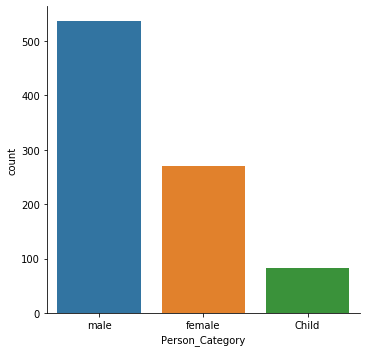

In [40]:
sns.catplot('Person_Category', data = data, kind='count')

Now, from the above graph, we know that there are 540 Men, 280 Women and 83 children (Age<16yrs) travelling in the ship

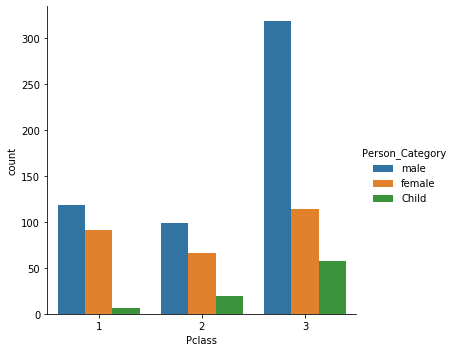

In [41]:
sns.catplot('Pclass', data=data, kind='count', hue='Person_Category')

We can quickly create the histogram to identify the distribution of passenger based on their Age group.

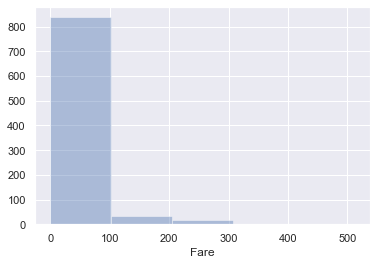

In [57]:
sns.distplot(data['Fare'], bins=5, kde=False)

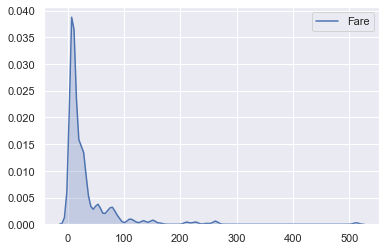

In [60]:
sns.kdeplot(data['Fare'], shade=True)

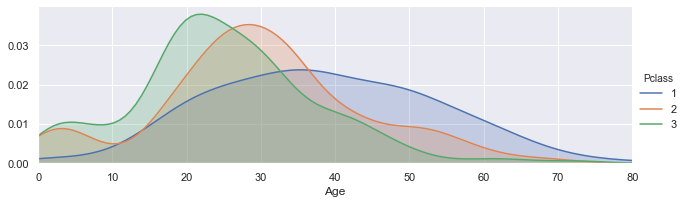

In [66]:
fig = sns.FacetGrid(data,hue='Pclass',aspect=3)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = data['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

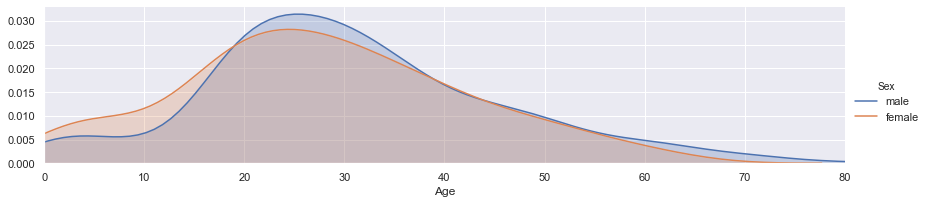

In [67]:
fig = sns.FacetGrid(data,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = data['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

The age distribution seems to be less varied in terms of male and female passengers, though we can say that there more younger females than younger males.

### Where did the Passengers come from?

The __Embarked__ attribute contains data for the passengers' port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton). 

In [70]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

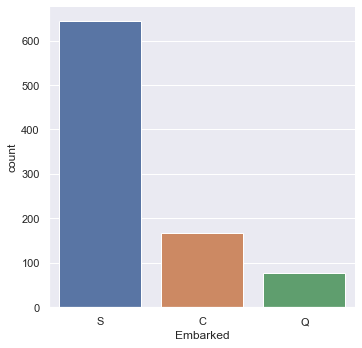

In [75]:
sns.catplot('Embarked', data=data, kind='count')

The above count plot tells us that 644 people are from SouthAmpton, 168 people are from Cherbourg and 77 people are from Queenstown.

Now, we further make a distribution based the Passenger Class. Let's determine number of people from Passenger Class - 1, 2 and 3 came from

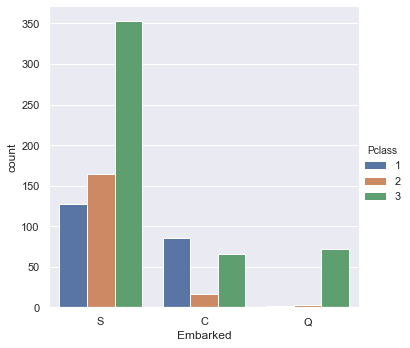

In [76]:
sns.catplot('Embarked', data=data, kind='count', hue='Pclass')

Now, we further make a distribution based the Passenger Class. Let's determine number of people from Male and Female passengers and where did they come from.

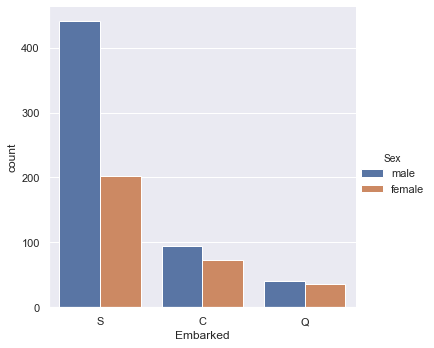

In [74]:
sns.catplot('Embarked', data=data, kind='count', hue='Sex')

### How many people have boarded the ship with their families?

The __SibsSP__ attribute refers to the number of siblings or spouses that a passenger had aboard. __Parch__ refers to the number of parents or children someone had on the ship.

As we're just trying to know if a passenger had _someone_ from his family onboard, we can make our life a bit easier by making another column to represent this data.

In [77]:
#Adding the number of family members a passenger had onboard
data['Alone'] = data.SibSp + data.Parch

In [78]:
data['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [79]:
data['Alone'].loc[data['Alone']>0] = 'No'

data['Alone'].loc[data['Alone']==0] = 'Yes'

C:\Users\hr\anaconda_new\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Anything above the other than 0 in the new __Alone__ column means that the person wasn't alone. So we're going to use that column to define our 'Alone' stats more clearly.

In [81]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person_Category,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes


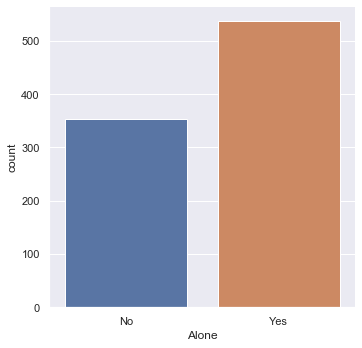

In [83]:
sns.factorplot('Alone',data=data,kind='count')

In [84]:
data['Alone'].value_counts()

Yes    537
No     354
Name: Alone, dtype: int64

This data tells us that 537 people were Alone and 354 people have their families

### Factors of Survival?

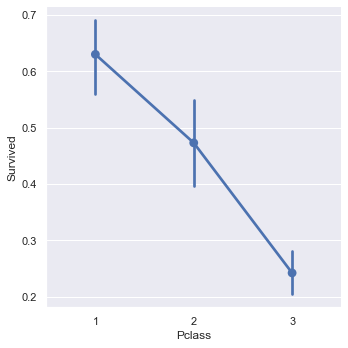

In [89]:
sns.factorplot('Pclass','Survived',data=data)

From the factor plot, it seems like lower class passengers had a lower chance of survival.

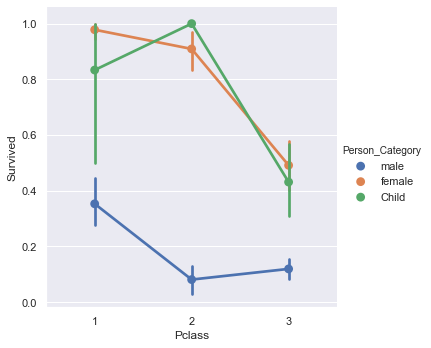

In [90]:
sns.factorplot('Pclass','Survived',hue='Person_Category',data=data)

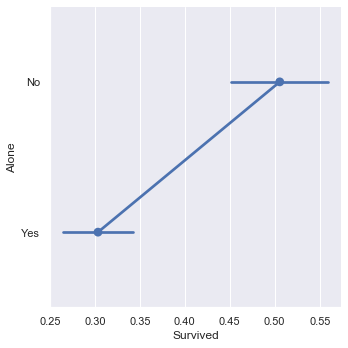

In [91]:
sns.factorplot('Survived','Alone',data=data)